In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Data Prep

In [2]:
# Grab and look at our data
DATA_LOCATION = 'AirPassengers.csv'
data = pd.read_csv(DATA_LOCATION)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Convert to DateTime
data["Month"] = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Split into Train/Val sets
split_value = 100
train, valid = data[:-12], data[-12:]

C:\Users\TSB\Miniconda3\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


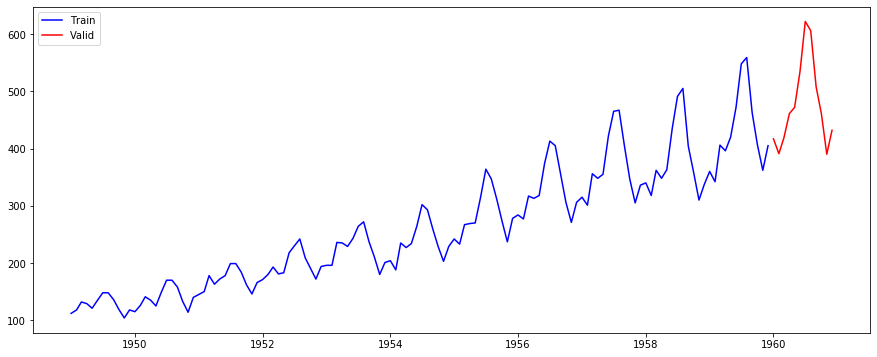

In [5]:
# Plot the data
plt.plot(train, color='b', label = 'Train')
plt.plot(valid, color='r', label = 'Valid')
plt.legend()

# Naive Forecasting

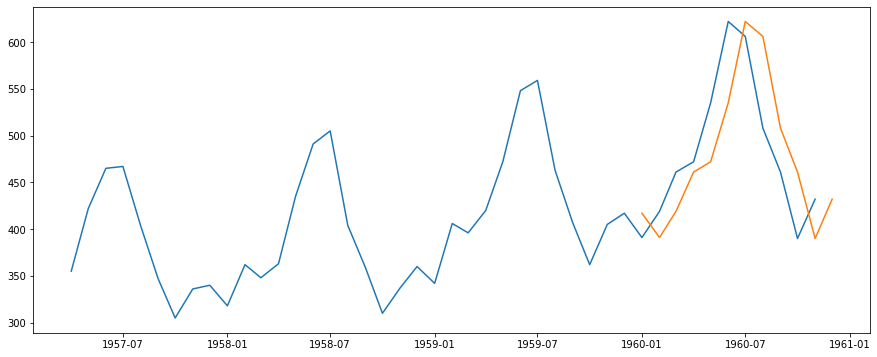

In [6]:
# Shift data back by 1 month
shifted_data = data.shift(-1, freq='MS')

naive_forecast = shifted_data[split_value:]

# Plot Validation sets
plt.plot(naive_forecast)
plt.plot(valid)

In [7]:
# Calculate our Mean Average Error as a baseline
errors = naive_forecast - valid
abs_errors = errors.abs()
mae = abs_errors.mean()
print("Mean Average Error Is:", mae[0])

Mean Average Error Is: 48.27272727272727


# Dense Model Forecasting

In [10]:
window_size = 12
n_features = 1
epochs = 180

window_generator = TimeseriesGenerator(train,
                                      train,
                                      length = window_size,
                                      batch_size = 6)

model = keras.models.Sequential([
    Dense(10, activation='relu', input_shape = (window_size, n_features)),
    Dense(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit_generator(window_generator,
                             epochs=epochs)

ValueError: cannot copy sequence with size 12 to array axis with dimension 1